In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches
%matplotlib inline
from scipy import stats, integrate
import pandas as pd
import numpy as np
import seaborn as sns 
sns.set()

In [2]:
# READ DATA SOURCES, MERGE AND CLEAN THE COMBINED DATAFRAME
# Read the two data sources
happiness_df = pd.read_csv("2016happiness.csv", encoding="ISO-8859-1")
web_access_df = pd.read_csv("web_access.csv", encoding="ISO-8859-1")

# Merge then on common column 'Country' with type 'inner'.
happyweb_pd = pd.merge(happiness_df,
                 web_access_df,
                 on='Country',
                 how ='inner')

# clean dataframe rows using dropna()
happyweb_pd = happyweb_pd.dropna(axis=0, thresh=1)  

happyweb_pd

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Healthy Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Internet Users -2016,Penetration (% of Pop),Population-2016,Non-Users (internetless),Users 1 Year Change (%),Internet Users 1 Year Change,Population 1 Y Change
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,"5,479,054",96.30%,"5,690,750","211,696",0.50%,"25,936",0.38%
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,"7,302,714",87.20%,"8,379,477","1,076,763",1%,"74,342",0.97%
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,"331,778",100%,"331,778",0,0.90%,"2,975",0.71%
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,"5,167,573",98%,"5,271,958","104,385",1.70%,"87,185",1.17%
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,"5,107,402",92.50%,"5,523,904","416,502",0.40%,"20,264",0.37%
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,"32,120,519",88.50%,"36,286,378","4,165,859",1.80%,"559,167",0.96%
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749,"15,915,076",93.70%,"16,979,729","1,064,653",0.60%,"98,813",0.32%
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553,"4,078,993",89.40%,"4,565,185","486,192",2.20%,"86,515",0.81%
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650,"20,679,490",85.10%,"24,309,330","3,629,840",1.70%,"350,522",1.42%
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734,"9,169,705",93.10%,"9,851,852","682,147",1%,"94,636",0.74%


In [3]:
# Add column ['Penetration_f'] that is equal to 'Penetration' column percentages converted to floats. 
# Added this column because percentage values are strings and can't be sorted - e.g.float('52%') doesn't work, so astype() is used.

happyweb_pd = happyweb_pd.assign(Penetration_f = happyweb_pd["Penetration (% of Pop)"].replace('%','',regex=True).astype('float'))

# Float values in 'Penetration_f' column are sorted (which sorts the dataframe using Penetration_f column) 

happyweb_pd = happyweb_pd.sort_values(['Penetration_f'], ascending=False)

happyweb_pd

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Healthy Life Expectancy,Freedom,...,Generosity,Dystopia Residual,Internet Users -2016,Penetration (% of Pop),Population-2016,Non-Users (internetless),Users 1 Year Change (%),Internet Users 1 Year Change,Population 1 Y Change,Penetration_f
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,...,0.47678,2.83137,"331,778",100%,"331,778",0,0.90%,"2,975",0.71%,100.0
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,...,0.37895,2.66465,"5,167,573",98%,"5,271,958","104,385",1.70%,"87,185",1.17%,98.0
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,...,0.36171,2.73939,"5,479,054",96.30%,"5,690,750","211,696",0.50%,"25,936",0.38%,96.3
19,Luxembourg,Western Europe,20,6.871,6.804,6.938,1.69752,1.03999,0.84542,0.54870,...,0.27571,2.11055,"548,807",95.20%,"576,243","27,436",1.90%,"10,314",1.61%,95.2
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,...,0.47416,2.70749,"15,915,076",93.70%,"16,979,729","1,064,653",0.60%,"98,813",0.32%,93.7
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,...,0.38254,2.54734,"9,169,705",93.10%,"9,851,852","682,147",1%,"94,636",0.74%,93.1
22,United Kingdom,Western Europe,23,6.725,6.647,6.803,1.40283,1.08672,0.80991,0.50036,...,0.50156,2.14999,"60,273,385",92.60%,"65,111,143","4,837,758",0.90%,"555,411",0.61%,92.6
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,...,0.25492,2.82596,"5,107,402",92.50%,"5,523,904","416,502",0.40%,"20,264",0.37%,92.5
34,Qatar,Middle East and Northern Africa,36,6.375,6.178,6.572,1.82427,0.87964,0.71723,0.56679,...,0.32388,1.58224,"2,108,970",92%,"2,291,368","182,398",2.80%,"57,708",2.51%,92.0
27,United Arab Emirates,Middle East and Northern Africa,28,6.573,6.494,6.652,1.57352,0.87114,0.72993,0.56215,...,0.26591,2.21507,"8,515,420",91.90%,"9,266,971","751,551",1.70%,"143,340",1.20%,91.9


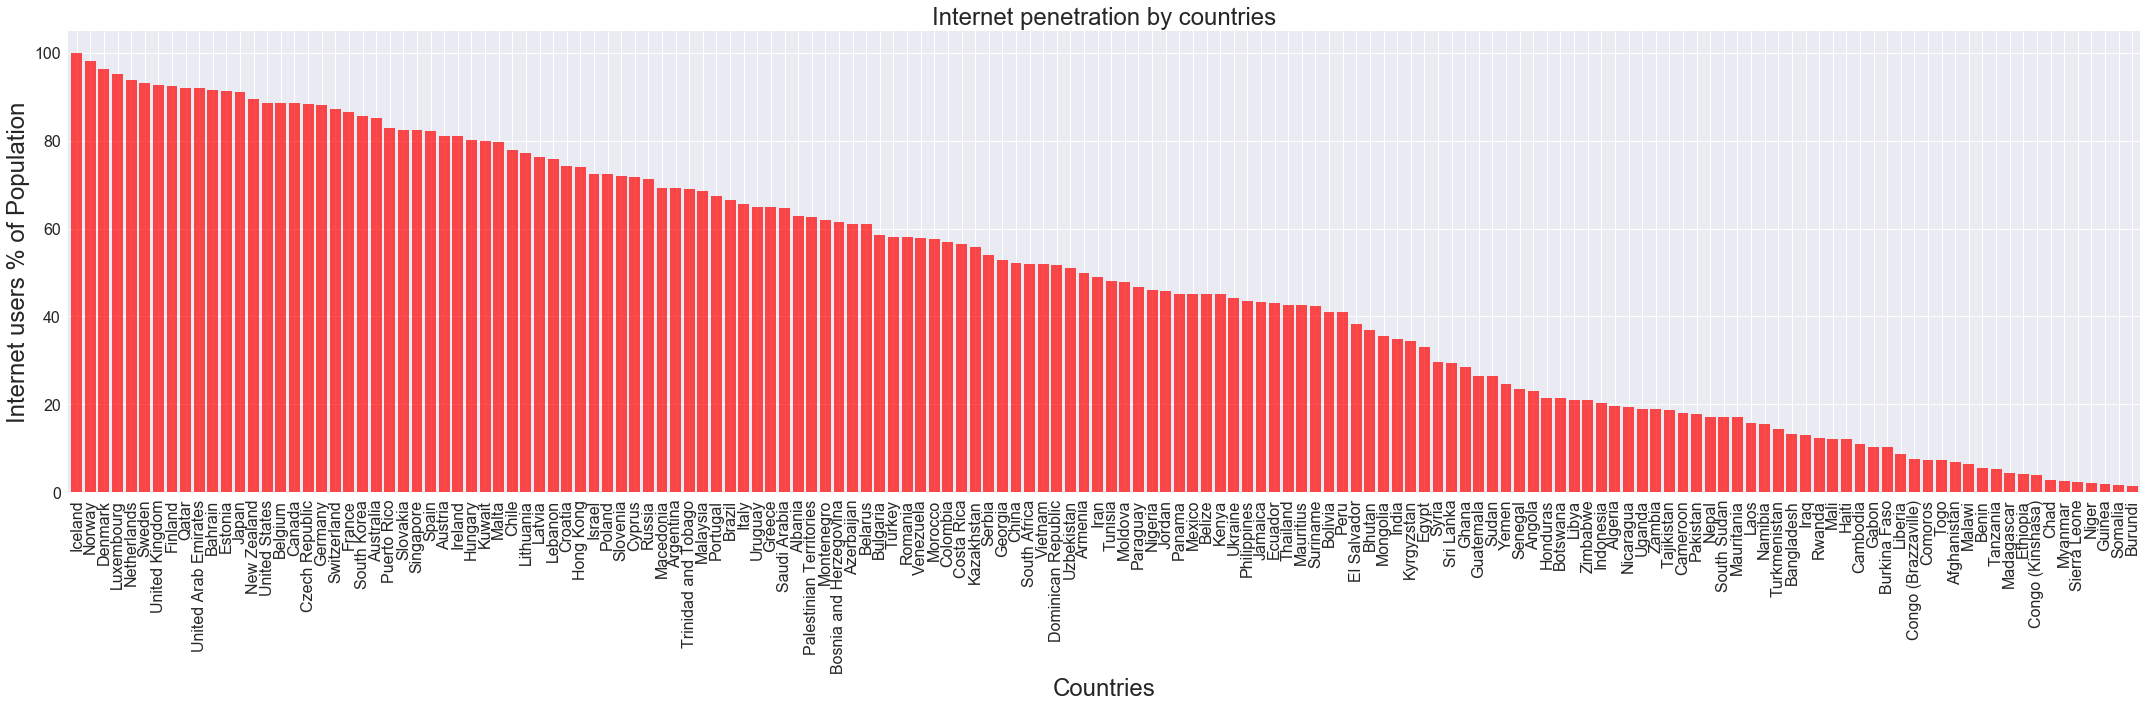

In [4]:
# INTERNET PENETRATION BY COUNTRIES

# Set x axis and tick locations
x_axis = np.arange(len(happyweb_pd))
x_tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(30,10))
y_axis = happyweb_pd["Penetration_f"]
plt.bar(x_axis, y_axis, color='r', alpha=0.7, align="edge")
plt.xticks(x_tick_locations, happyweb_pd["Country"], rotation="vertical", fontsize = 16)
plt.yticks(fontsize = 16)
# Set x and y limits
plt.xlim(-0.25, len(x_axis))
# Set a Title and labels
plt.title("Internet penetration by countries", fontsize = 24)
plt.xlabel("Countries", fontsize = 24)
plt.ylabel("Internet users % of Population", fontsize = 24)
# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Internet penetration by countries")
plt.show()


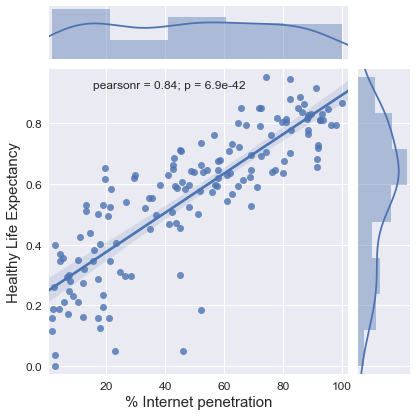

In [5]:
# HEALTHY LIFE EXPECTANCY) BY INTERNET PENETRATION BY COUNTRIES - VISUALIZATION #1
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

markersize = 50 
kws = dict(s=markersize, linewidth=.8, edgecolor="bk")
sns.set(font_scale = 1.2)

xlim_max = happyweb_pd["Penetration_f"].max()
ylim_max = happyweb_pd["Healthy Life Expectancy"].max()
xlim_min = happyweb_pd["Penetration_f"].min()
ylim_min = happyweb_pd["Healthy Life Expectancy"].min()

pyber_palette = ['#c6fcff','#1b919a','#ff0033','#000099','#ffff66']  
# light Sky blue, Green, Red, blue, Yellow

sns.jointplot(x="Penetration_f", y="Healthy Life Expectancy", data=happyweb_pd, kind="reg");

#plt.text(8, 45, "Note: add text", horizontalalignment='left',size='medium', color='green', weight='light')
#plt.title("Health ((Life Expectancy) vs Internet penetration by countries", fontsize = 15)
plt.ylabel("Healthy Life Expectancy", fontsize = 15)
plt.xlabel("% Internet penetration", fontsize = 15)
plt.xlim(xlim_min-1, xlim_max+2)    # margins so plot doesn't end at max values
plt.ylim(ylim_min-.025, ylim_max+.025)

# Save the figure
plt.savefig("Healthy Life Expectancy vs Internet penetration by countries #1")

plt.show()

<function matplotlib.pyplot.show>

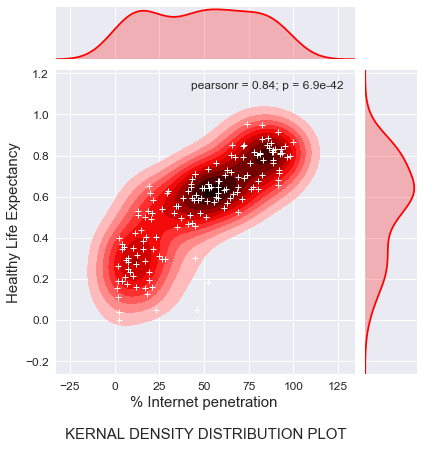

In [6]:
g = sns.jointplot(x="Penetration_f", y="Healthy Life Expectancy", data=happyweb_pd, kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
#g.set_axis_labels("$Percent Internet Penetration$", "Healthy Life Expectancy$");
plt.ylabel("Healthy Life Expectancy", fontsize = 15)
plt.xlabel("% Internet penetration \n \n KERNAL DENSITY DISTRIBUTION PLOT ", fontsize = 15)

# Save the figure
plt.savefig("Healthy Life Expectancy vs Internet penetration by countries #2")
plt.show

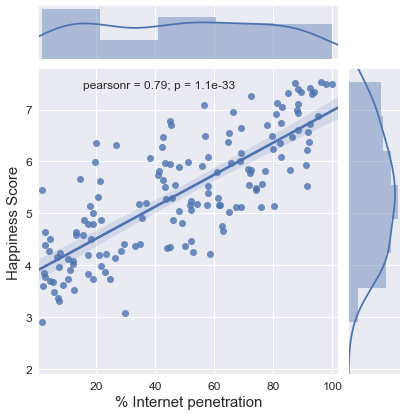

In [7]:
# HAPPINESS BY INTERNET PENETRATION BY COUNTRIES

markersize = 50 
kws = dict(s=markersize, linewidth=.8, edgecolor="bk")
sns.set(font_scale = 1.2)

xlim_max = happyweb_pd["Penetration_f"].max()
ylim_max = happyweb_pd["Happiness Score"].max()
xlim_min = happyweb_pd["Penetration_f"].min()
ylim_min = happyweb_pd["Happiness Score"].min()

pyber_palette = ['#c6fcff','#1b919a','#ff0033','#000099','#ffff66']  
# light Sky blue, Green, Red, blue, Yellow

sns.jointplot(x="Penetration_f", y="Happiness Score", data=happyweb_pd, kind="reg");

#plt.title("Health (Life Expectancy) vs Internet penetration by countries", fontsize = 15)
plt.ylabel("Happiness Score", fontsize = 15)
plt.xlabel("% Internet penetration", fontsize = 15)
plt.xlim(xlim_min-1, xlim_max+2)    # margins so plot doesn't end at max values
plt.ylim(ylim_min-1, ylim_max+0.25)

# Save the figure
plt.savefig("Happiness Score vs Percent Internet penetration #1")

plt.show()

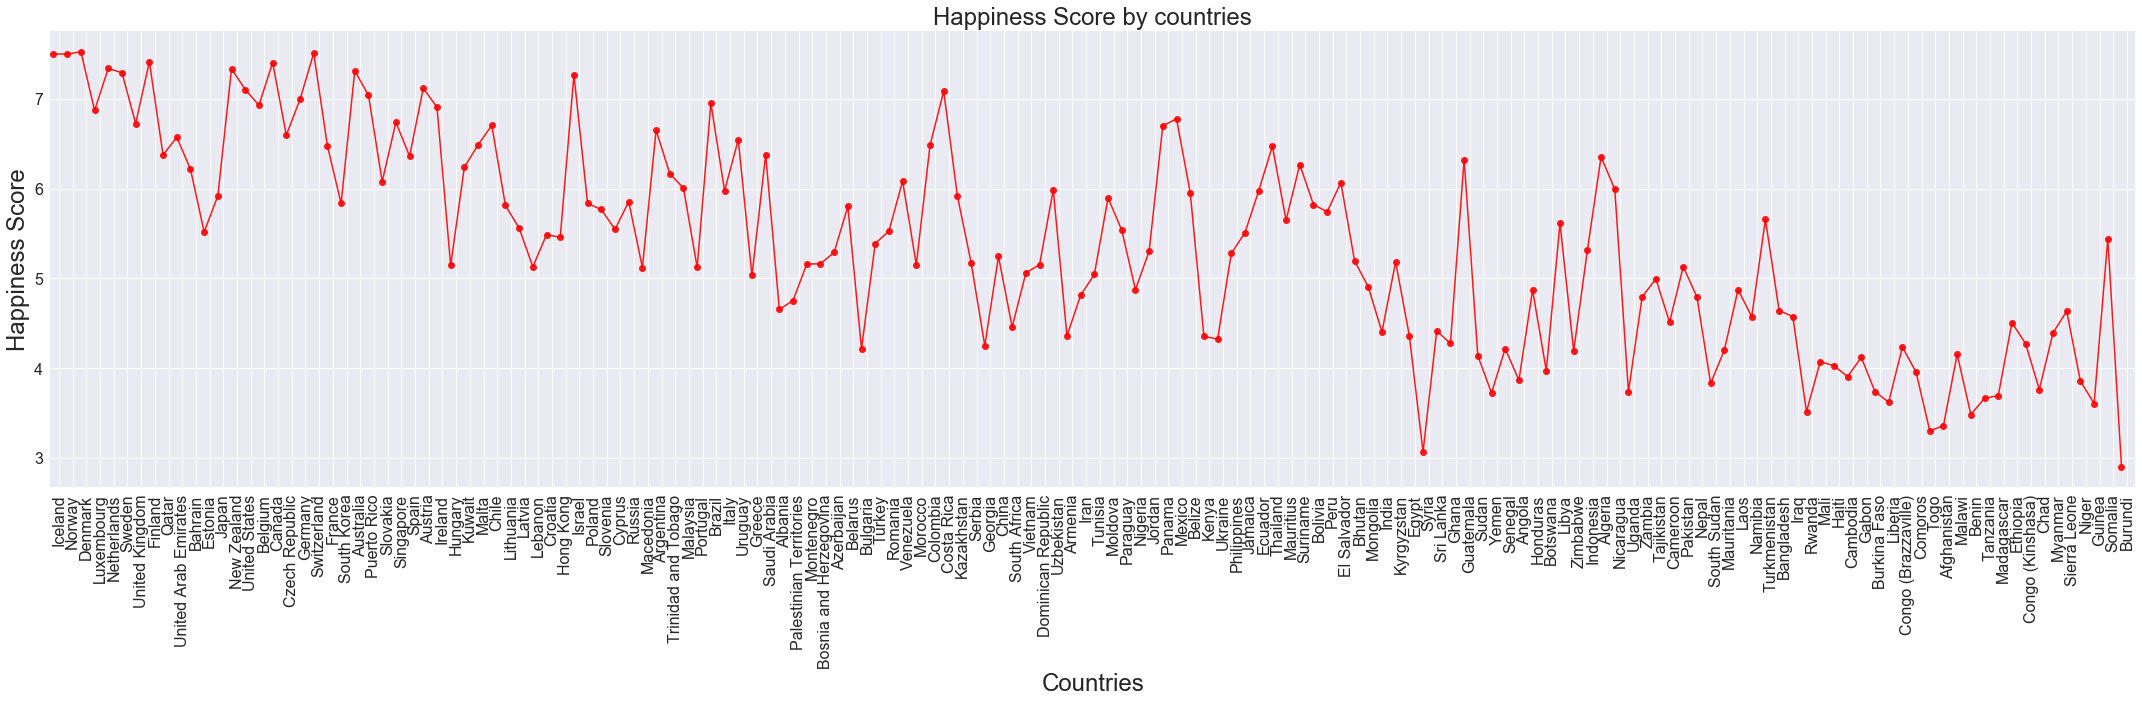

In [8]:
# Set x axis and tick locations
x_axis = np.arange(len(happyweb_pd))
x_tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(30,10))
y_axis = happyweb_pd["Happiness Score"]
plt.plot(x_axis, y_axis, marker='o', color='r', linewidth=1.5, alpha=0.9)
#plt.bar(x_axis, y_axis, color='r', alpha=0.7, align="edge")
plt.xticks(x_tick_locations, happyweb_pd["Country"], rotation="vertical", fontsize = 16)
plt.yticks(fontsize = 16)
# Set x and y limits
plt.xlim(-0.25, len(x_axis))
# Set a Title and labels
plt.title("Happiness Score by countries", fontsize = 24)
plt.xlabel("Countries", fontsize = 24)
plt.ylabel("Happiness Score", fontsize = 24)
# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Happiness Score by countries #2")
plt.show()

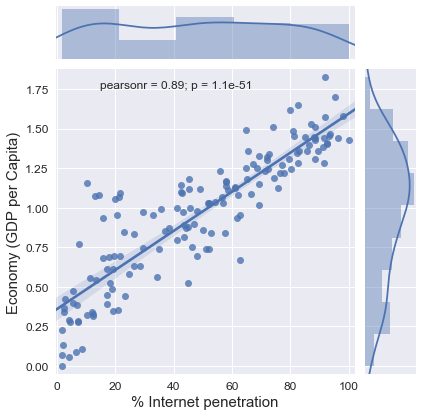

In [9]:
# ECONOMY (GDP PER CAPITA) VS. INTERNET PENETRATION BY COUNTRIES
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

markersize = 50 
kws = dict(s=markersize, linewidth=.8, edgecolor="bk")
sns.set(font_scale = 1.2)

xlim_max = happyweb_pd["Penetration_f"].max()
ylim_max = happyweb_pd["Economy (GDP per Capita)"].max()
xlim_min = happyweb_pd["Penetration_f"].min()
ylim_min = happyweb_pd["Economy (GDP per Capita)"].min()

pyber_palette = ['#c6fcff','#1b919a','#ff0033','#000099','#ffff66']  
# light Sky blue, Green, Red, blue, Yellow

sns.jointplot(x="Penetration_f", y="Economy (GDP per Capita)", data=happyweb_pd, kind="reg");

#plt.text(8, 45, "Note: add text", horizontalalignment='left',size='medium', color='green', weight='light')
#plt.title("Health ((Life Expectancy) vs Internet penetration by countries", fontsize = 15)
plt.ylabel("Economy (GDP per Capita)", fontsize = 15)
plt.xlabel("% Internet penetration", fontsize = 15)
plt.xlim(xlim_min-2, xlim_max+2)    # margins so plot doesn't end at max values
plt.ylim(ylim_min-0.05, ylim_max+0.05)

# Save the figure
plt.savefig("Economy (GDP per Capita) vs Internet penetration by countries #1")
plt.show()

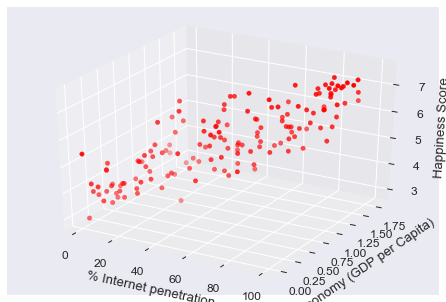

In [10]:
fig = plt.figure()
#ax= fig.add_subplot(111, projection='3d')
ax= Axes3D(fig)
x= happyweb_pd["Penetration_f"]
y= happyweb_pd["Economy (GDP per Capita)"]
z= happyweb_pd["Happiness Score"]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel("\n % Internet penetration")
ax.set_ylabel("\n Economy (GDP per Capita)")
ax.set_zlabel("\n Happiness Score")

plt.savefig("3D Plot of Economy(GDP) vs % Internet penetration vs Happiness Score #2")
plt.show()

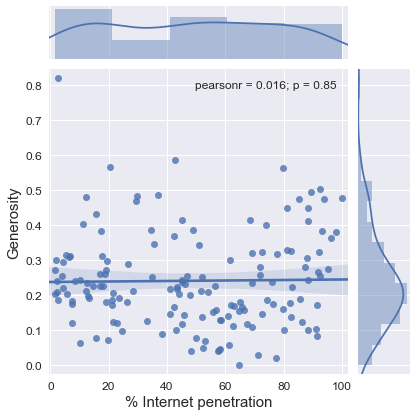

In [11]:
# GENEROSITY VS. INTERNET PENETRATION BY COUNTRIES
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

markersize = 50 
kws = dict(s=markersize, linewidth=.8, edgecolor="bk")
sns.set(font_scale = 1.2)

xlim_max = happyweb_pd["Penetration_f"].max()
ylim_max = happyweb_pd["Generosity"].max()
xlim_min = happyweb_pd["Penetration_f"].min()
ylim_min = happyweb_pd["Generosity"].min()

pyber_palette = ['#c6fcff','#1b919a','#ff0033','#000099','#ffff66']  
# light Sky blue, Green, Red, blue, Yellow

sns.jointplot(x="Penetration_f", y="Generosity", data=happyweb_pd, kind="reg");

#plt.text(8, 45, "Note: add text", horizontalalignment='left',size='medium', color='green', weight='light')
#plt.title("Health ((Life Expectancy) vs Internet penetration by countries", fontsize = 15)
plt.ylabel("Generosity", fontsize = 15)
plt.xlabel("% Internet penetration", fontsize = 15)
plt.xlim(xlim_min-2, xlim_max+2)    # margins so plot doesn't end at max values
plt.ylim(ylim_min-0.025, ylim_max+0.025)

# Save the figure
plt.savefig("Generosity vs Internet penetration by countries #1")

plt.show()

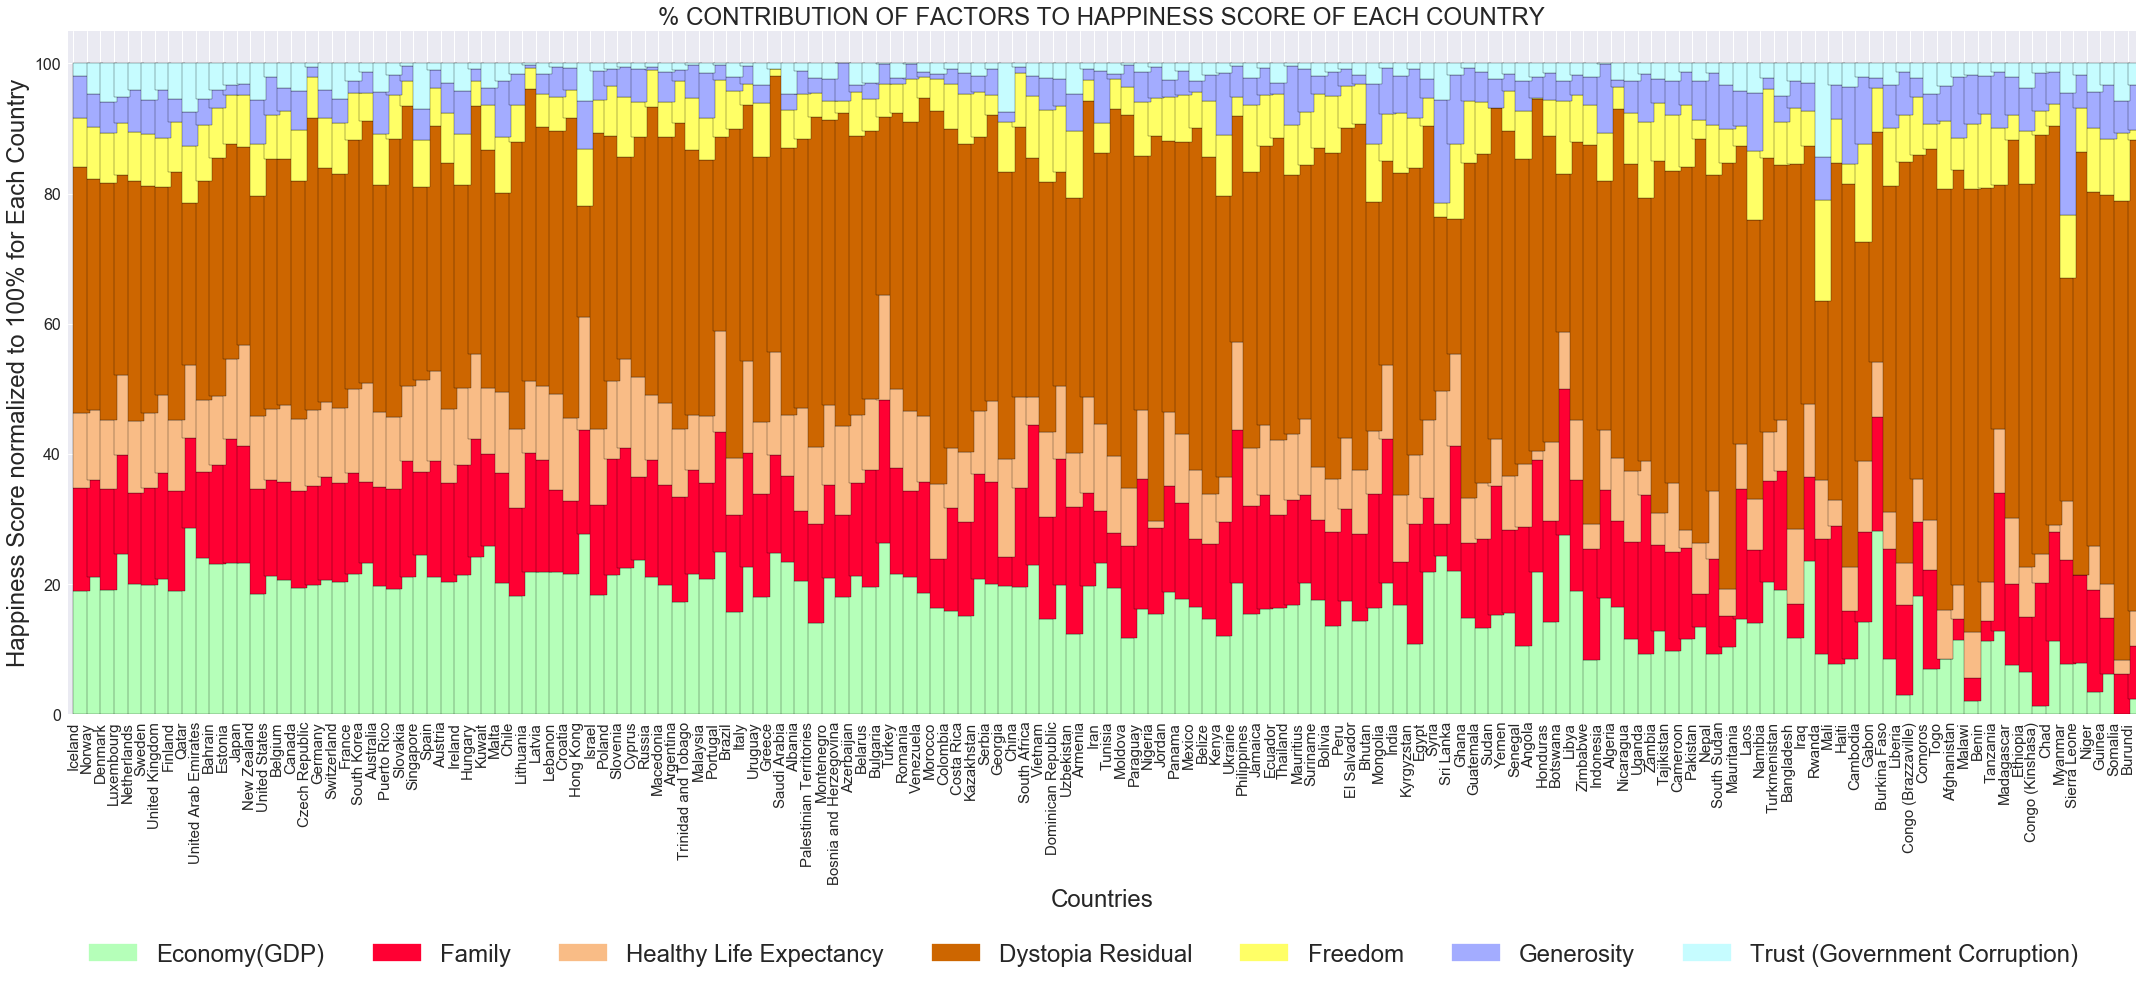

In [12]:
# Set x axis and tick locations
x_axis = np.arange(len(happyweb_pd))
x_tick_locations = [value+0.4 for value in x_axis]

greenbars = [i / j * 100 for i,j in zip(happyweb_pd["Economy (GDP per Capita)"], happyweb_pd["Happiness Score"])]
orangebars = [i / j * 100 for i,j in zip(happyweb_pd["Healthy Life Expectancy"], happyweb_pd["Happiness Score"])]
bluebars = [i / j * 100 for i,j in zip(happyweb_pd["Generosity"], happyweb_pd["Happiness Score"])]
redbars = [i / j * 100 for i,j in zip(happyweb_pd["Family"], happyweb_pd["Happiness Score"])]
yellowbars = [i / j * 100 for i,j in zip(happyweb_pd["Freedom"], happyweb_pd["Happiness Score"])]
skybluebars = [i / j * 100 for i,j in zip(happyweb_pd["Trust (Government Corruption)"], happyweb_pd["Happiness Score"])]
brownbars = [i / j * 100 for i,j in zip(happyweb_pd["Dystopia Residual"], happyweb_pd["Happiness Score"])]
                                      
# plot
barWidth = 1.2
plt.figure(figsize=(30,13))

# Create green Bars
plt.bar(x_tick_locations, greenbars, color='#b5ffb9', edgecolor='black', width=barWidth, align="edge")
# Create red Bars
plt.bar(x_tick_locations, redbars, bottom=greenbars, color='#ff0033', edgecolor='black', width=barWidth, align="edge")
# Create orange Bars
plt.bar(x_tick_locations, orangebars, bottom=[i+j for i,j in zip(greenbars, redbars)], color='#f9bc86', edgecolor='black', width=barWidth, align="edge")
# Create brown Bars
plt.bar(x_tick_locations, brownbars, bottom=[i+j+k for i,j,k in zip(greenbars, redbars, orangebars)], color='#cd6600', edgecolor='black', width=barWidth, align="edge")
# Create yellow Bars
plt.bar(x_tick_locations, yellowbars, bottom=[i+j+k+l for i,j,k,l in zip(greenbars, redbars, orangebars, brownbars)], color='#ffff66', edgecolor='black', width=barWidth, align="edge")
# Create blue Bars
plt.bar(x_tick_locations, bluebars, bottom=[i+j+k+l+m for i,j,k,l,m in zip(greenbars, redbars, orangebars, brownbars, yellowbars)], color='#a3acff', edgecolor='black', width=barWidth, align="edge")
# Create skyblue Bars
plt.bar(x_tick_locations, skybluebars, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(greenbars, redbars, orangebars, brownbars, yellowbars, bluebars)], color='#c6fcff', edgecolor='black', width=barWidth, align="edge")


# Custom x axis
plt.xticks(x_tick_locations, happyweb_pd["Country"], rotation="vertical", fontsize = 15)  
plt.yticks(fontsize = 16)
plt.xlabel("Countries", fontsize = 24)
plt.ylabel("Happiness Score normalized to 100% for Each Country", fontsize = 24)
plt.xlim(0, len(x_axis))
plt.title("% CONTRIBUTION OF FACTORS TO HAPPINESS SCORE OF EACH COUNTRY", fontsize = 24)
plt.tight_layout()
# '#dbb40c', '#c6fcff', '#ffd8b1' ->  Gold, light Sky blue, light coral

green_patch = mpatches.Patch(color='#b5ffb9', label='Economy(GDP)')
orange_patch = mpatches.Patch(color='#f9bc86', label='Healthy Life Expectancy')
blue_patch = mpatches.Patch(color='#a3acff', label='Generosity')
red_patch = mpatches.Patch(color='#ff0033', label='Family')
yellow_patch = mpatches.Patch(color='#ffff66', label='Freedom')
skyblue_patch = mpatches.Patch(color='#c6fcff', label='Trust (Government Corruption)')
brown_patch = mpatches.Patch(color='#cd6600', label='Dystopia Residual')

# Locate legend horizontally using ncol=7 for 7 names. The legend box is located below (0,0)- Graph rectangle is (0,0) to (1,1)
plt.legend(handles=[green_patch, red_patch, orange_patch, brown_patch, yellow_patch, blue_patch, skyblue_patch], fontsize = 24, loc = 'lower left', bbox_to_anchor=(0, -0.4), ncol=7, fancybox=True, shadow=True)

# Save graph and Show it
plt.savefig("% Contribution of Factors to Happiness Score of Each Country")
plt.show()